<a href="https://colab.research.google.com/github/orifelszer/CrimeData/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!git clone https://github.com/orifelszer/CrimeData.git

import os
import zipfile
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
zip_folder = 'CrimeData'

zip_files = [f for f in os.listdir(zip_folder) if f.endswith('.zip')]

for zip_file in zip_files:
    zip_path = os.path.join(zip_folder, zip_file)
    extract_path = os.path.join(zip_folder, zip_file.replace('.zip', ''))

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted: {zip_file} -> {extract_path}")

In [ ]:
csv_files = glob.glob("CrimeData/**/*.csv", recursive=True)
dataframes = {f"Crimes_{file[-8:-4]}": pd.read_csv(file) for file in csv_files}

In [ ]:
combined_data = pd.concat(dataframes, axis=0, ignore_index=True)
combined_data

,FictiveIDNumber,Year,Quarter,YeshuvKod,Yeshuv,PoliceDistrictKod,PoliceDistrict,PoliceMerhavKod,PoliceMerhav,PoliceStationKod,PoliceStation,municipalKod,municipalName,StatisticAreaKod,StatisticArea,StatisticGroupKod,StatisticGroup,StatisticTypeKod,StatisticType,target
0,9DF96CE4D6AB4649CECEAEFBAF3AF07C,2019.0,Q3,8400.0,רחובות,40000000.0,מחוז מרכז,41200000.0,מרחב שפלה,41212000.0,תחנת רחובות שפלה,NaN,NaN,84000222.0,אושיות,700.0,עבירות כלפי הרכוש,715.0,גניבות אחרות,NaN
1,BA008B3B18529E6E4C831139FDA8B172,2019.0,Q4,510.0,כפר מנדא,10000000.0,מחוז צפון,15002736.0,מרחב גליל צפון,12401000.0,תחנת משגב גליל צפון,NaN,NaN,NaN,NaN,600.0,עבירות כלפי המוסר,608.0,שמוש בסמים מסוכנים,NaN
2,1905BE9ECCA0AEDA4C4D13705F7A5672,2019.0,Q3,7000.0,לוד,40000000.0,מחוז מרכז,41200000.0,מרחב שפלה,41213000.0,תחנת לוד שפלה,NaN,NaN,70000022.0,גבעת הזיתים,700.0,עבירות כלפי הרכוש,712.0,גניבה מתוך רכב,NaN
3,5843D35EBA3C57AADF22435516ACD203,2019.0,Q3,8400.0,רחובות,40000000.0,מחוז מרכז,41200000.0,מרחב שפלה,41212000.0,תחנת רחובות שפלה,NaN,NaN,84000116.0,החלוץ/ העבודה,200.0,עבירות סדר ציבורי,220.0,עבירות על חוק הכניסה לישראל,NaN
4,BFF2C9D05A0250AFB2A4CB985FF2FA62,2019.0,Q1,6900.0,כפר סבא,40000000.0,מחוז מרכז,41100000.0,מרחב שרון,41112000.0,תחנת כפר סבא שרון,NaN,NaN,NaN,NaN,700.0,עבירות כלפי הרכוש,723.0,גניבת חלקי רכב,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598366,E03F19BC624B58943C4A36DC86E36C53,2020.0,Q3,9000.0,באר שבע,30000000.0,מחוז דרומי,31300000.0,מרחב נגב,31311000.0,תחנת באר שבע נגב,NaN,NaN,90000624.0,העיר העתיקה מרכז אזרחי,400.0,עבירות נגד גוף,404.0,(תקיפה (למעט עובדי ציבור,NaN
3598367,21648BA209587EFABAAC9A112A168ED5,2020.0,Q2,8500.0,רמלה,40000000.0,מחוז מרכז,41200000.0,מרחב שפלה,41211000.0,תחנת רמלה שפלה,NaN,NaN,85000045.0,ג'וואריש נווה דקלים,400.0,עבירות נגד גוף,404.0,(תקיפה (למעט עובדי ציבור,NaN
3598368,400F09CF9295384D7A5AFD0D5901FA7F,2020.0,Q1,6200.0,בת ים,20000000.0,מחוז תא,21800000.0,מרחב איילון החדש תא,15005711.0,תחנת בת ים איילון החדש,NaN,NaN,62000114.0,"בי""ס בית וגן רח' הרב קוק",400.0,עבירות נגד גוף,404.0,(תקיפה (למעט עובדי ציבור,NaN
3598369,08C2C381C80E76A36A59625D06AAD44F,2020.0,Q1,8700.0,רעננה,40000000.0,מחוז מרכז,41100000.0,מרחב שרון,41112000.0,תחנת כפר סבא שרון,NaN,NaN,87000032.0,הרצל/ יהודה הלוי,200.0,עבירות סדר ציבורי,220.0,עבירות על חוק הכניסה לישראל,NaN


In [ ]:
# מבנה הנתונים
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598371 entries, 0 to 3598370
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FictiveIDNumber    object 
 1   Year               float64
 2   Quarter            object 
 3   YeshuvKod          float64
 4   Yeshuv             object 
 5   PoliceDistrictKod  float64
 6   PoliceDistrict     object 
 7   PoliceMerhavKod    float64
 8   PoliceMerhav       object 
 9   PoliceStationKod   float64
 10  PoliceStation      object 
 11  municipalKod       float64
 12  municipalName      object 
 13  StatisticAreaKod   float64
 14  StatisticArea      object 
 15  StatisticGroupKod  float64
 16  StatisticGroup     object 
 17  StatisticTypeKod   float64
 18  StatisticType      object 
 19  target             float64
dtypes: float64(10), object(10)
memory usage: 549.1+ MB


Given the large size of our dataset, optimizing data types is crucial for improving performance and reducing memory usage. Specifically, we will convert float64 and object columns to more efficient data types, which will save space and allow the code to execute faster.

In [ ]:
# תיאור סטטיסטי של הנתונים
combined_data.describe()

,Year,YeshuvKod,PoliceDistrictKod,PoliceMerhavKod,PoliceStationKod,municipalKod,StatisticAreaKod,StatisticGroupKod,StatisticTypeKod,target
count,2.341173e+06,2.030352e+06,2.341173e+06,2.341173e+06,2.341173e+06,179351.000000,1.480532e+06,2.341173e+06,2.341173e+06,1.257198e+06
mean,2.021394e+03,4.687374e+03,3.905999e+07,3.158307e+07,3.699085e+07,35.749781,5.303095e+07,5.318704e+02,5.418855e+02,6.811725e+00
std,1.650468e+00,2.937389e+03,2.206618e+07,1.543080e+07,2.161290e+07,25.367089,2.742216e+07,8.647978e+02,8.669626e+02,2.979137e+00
min,2.019000e+03,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.100010e+05,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.020000e+03,2.600000e+03,2.000000e+07,1.500522e+07,1.500571e+07,15.000000,3.000092e+07,2.000000e+02,2.120000e+02,4.000000e+00
50%,2.021000e+03,5.000000e+03,3.000000e+07,3.120000e+07,3.131300e+07,30.000000,5.000093e+07,4.000000e+02,4.040000e+02,7.000000e+00
75%,2.023000e+03,7.400000e+03,5.000000e+07,4.120000e+07,5.121000e+07,53.000000,7.700002e+07,7.000000e+02,7.150000e+02,1.000000e+01
max,2.024000e+03,9.800000e+03,8.000000e+07,7.150000e+07,8.170000e+07,100.000000,9.800000e+07,1.000000e+04,1.003900e+04,1.300000e+01


In [ ]:
# בדיקת הערכים החסרים
missing_values = combined_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 FictiveIDNumber      1257198
Year                 1257198
Quarter              1257198
YeshuvKod            1568019
Yeshuv               1568019
PoliceDistrictKod    1257198
PoliceDistrict       1257198
PoliceMerhavKod      1257198
PoliceMerhav         1257198
PoliceStationKod     1257198
PoliceStation        1257198
municipalKod         3419020
municipalName        3268140
StatisticAreaKod     2117839
StatisticArea        2217778
StatisticGroupKod    1257198
StatisticGroup       1257198
StatisticTypeKod     1257198
StatisticType        1257198
target               2341173
dtype: int64


<Figure size 1000x600 with 0 Axes>

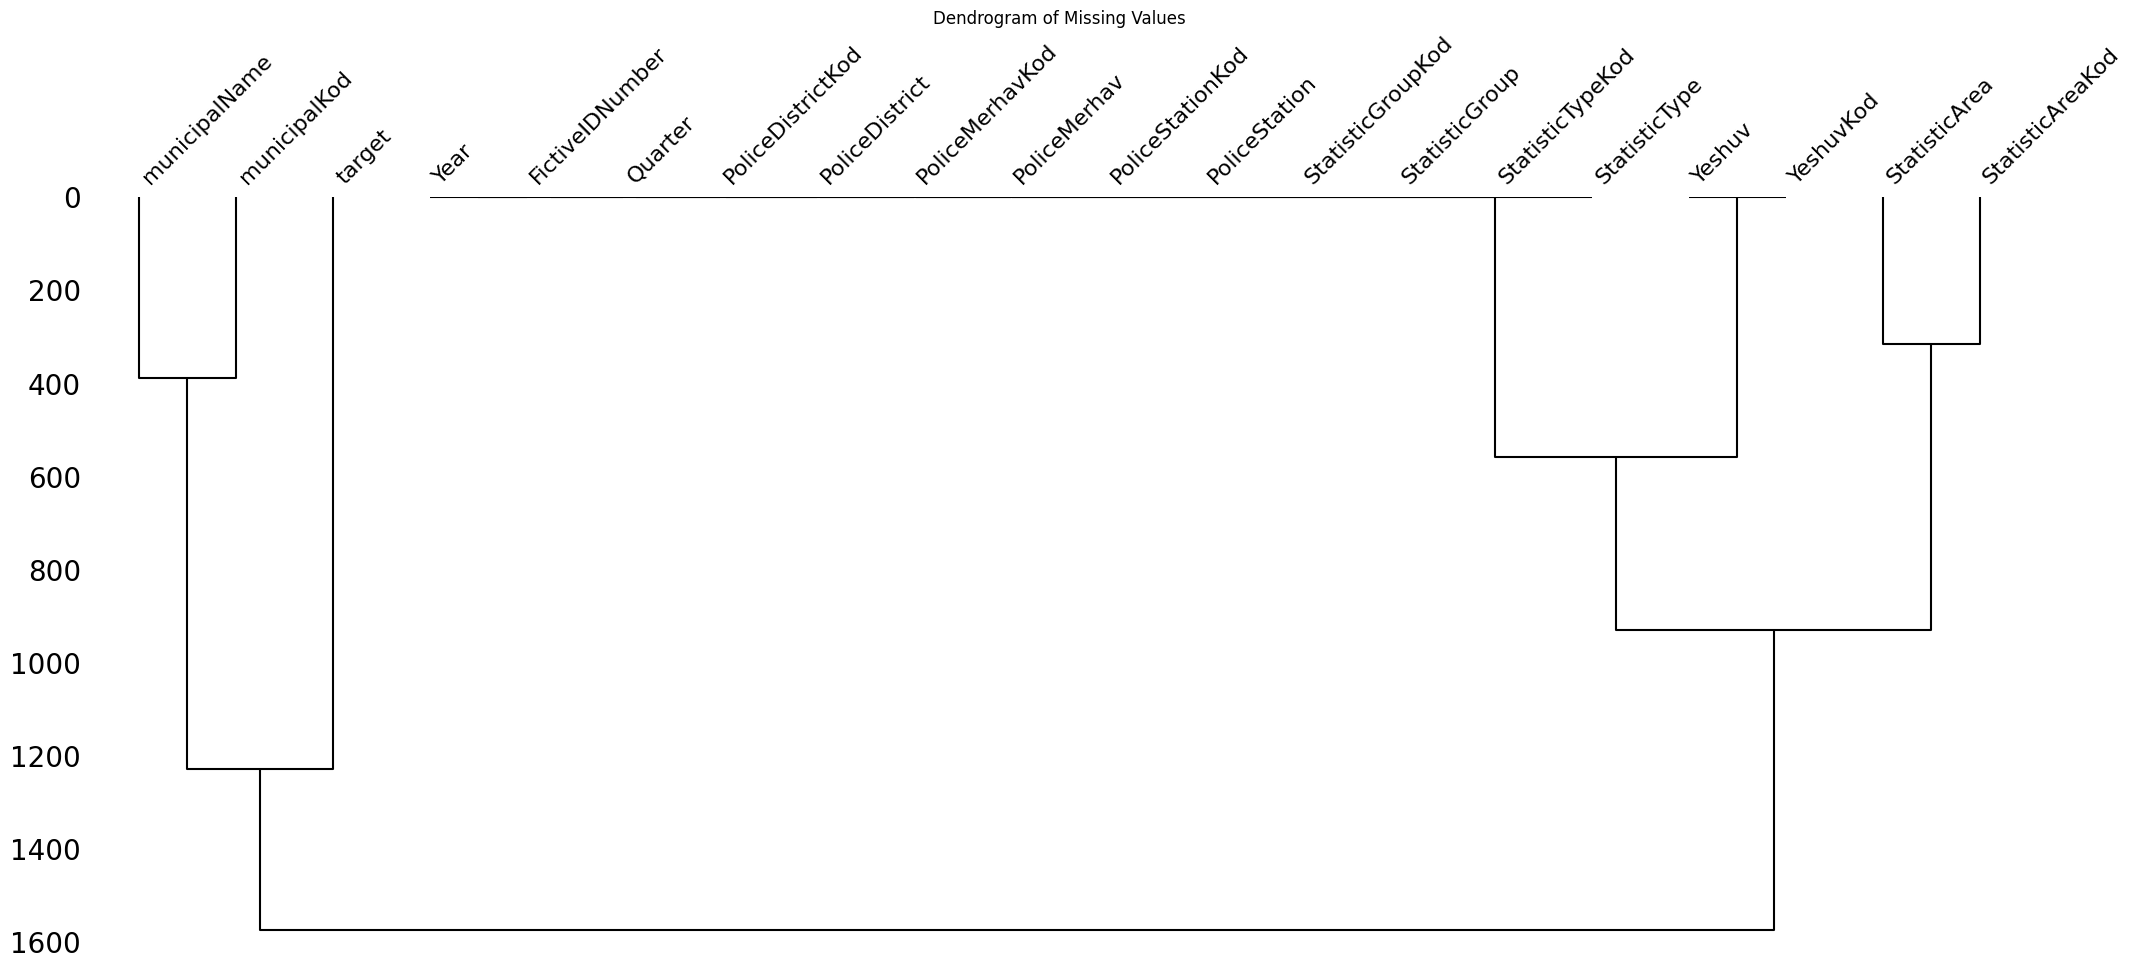

In [ ]:


# Adjusting the size of the dendrogram for a smaller display
plt.figure(figsize=(10, 6))  # Reduced width and height
msno.dendrogram(combined_data)
plt.title('Dendrogram of Missing Values')
plt.show()



The dendrogram visualizes the distance or dissimilarity between the missing data patterns across columns. For example:

*   municipalName and municipalKod are clustered together, indicating similar missing data patterns.
*   StatisticType, StatisticTypeKod, Yeshuv, and YeshuvKod also form a group, suggesting similar patterns of missingness. This visualization is helpful for identifying relationships in missing data and deciding on appropriate strategies for handling it.




After exploring the structure and missing data in our dataset, we now turn to examine the geographical distribution of the data.

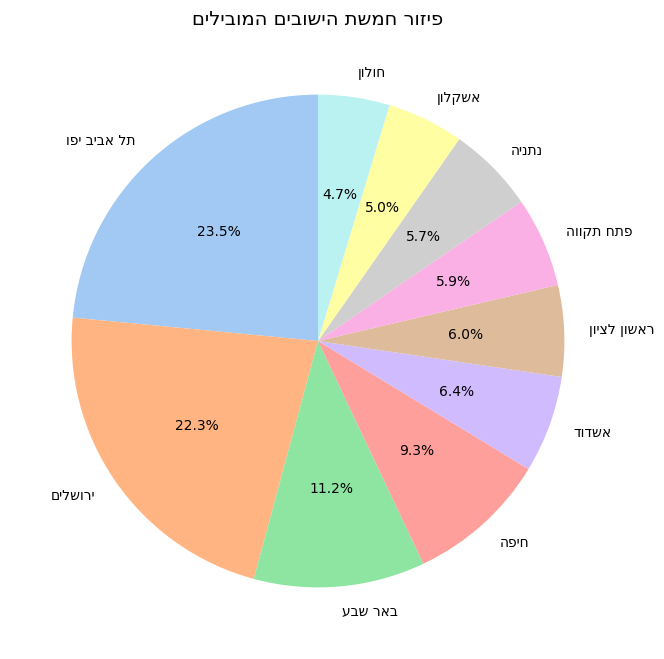

In [ ]:
# Reverse Hebrew text for the pie chart labels
def reverse_hebrew_text(text):
    return text[::-1] if isinstance(text, str) else text

# Reverse the labels in the 'Yeshuv' column so it fits the Hebrew RTL
if 'Yeshuv' in combined_data.columns:
    combined_data['Yeshuv'] = combined_data['Yeshuv'].apply(reverse_hebrew_text)

    # Calculate the top 10 Yeshuv by count
    top_yeshuv = combined_data['Yeshuv'].value_counts().head(10)

    # Create a pie chart for the top 10 Yeshuv
    plt.figure(figsize=(8, 8))
    top_yeshuv.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(reverse_hebrew_text('פיזור חמשת הישובים המובילים'), fontsize=14)
    plt.ylabel('')
    plt.show()
else:
    print("The 'Yeshuv' column does not exist in the dataset.")


The geographical analysis shows that Tel Aviv (תל אביב יפו) and Jerusalem (ירושלים) account for the largest shares in the dataset. Other notable settlements, such as Ashdod (אשדוד), Be'er Sheva (באר שבע), and Holon (חולון), also make significant contributions, though to a lesser extent.

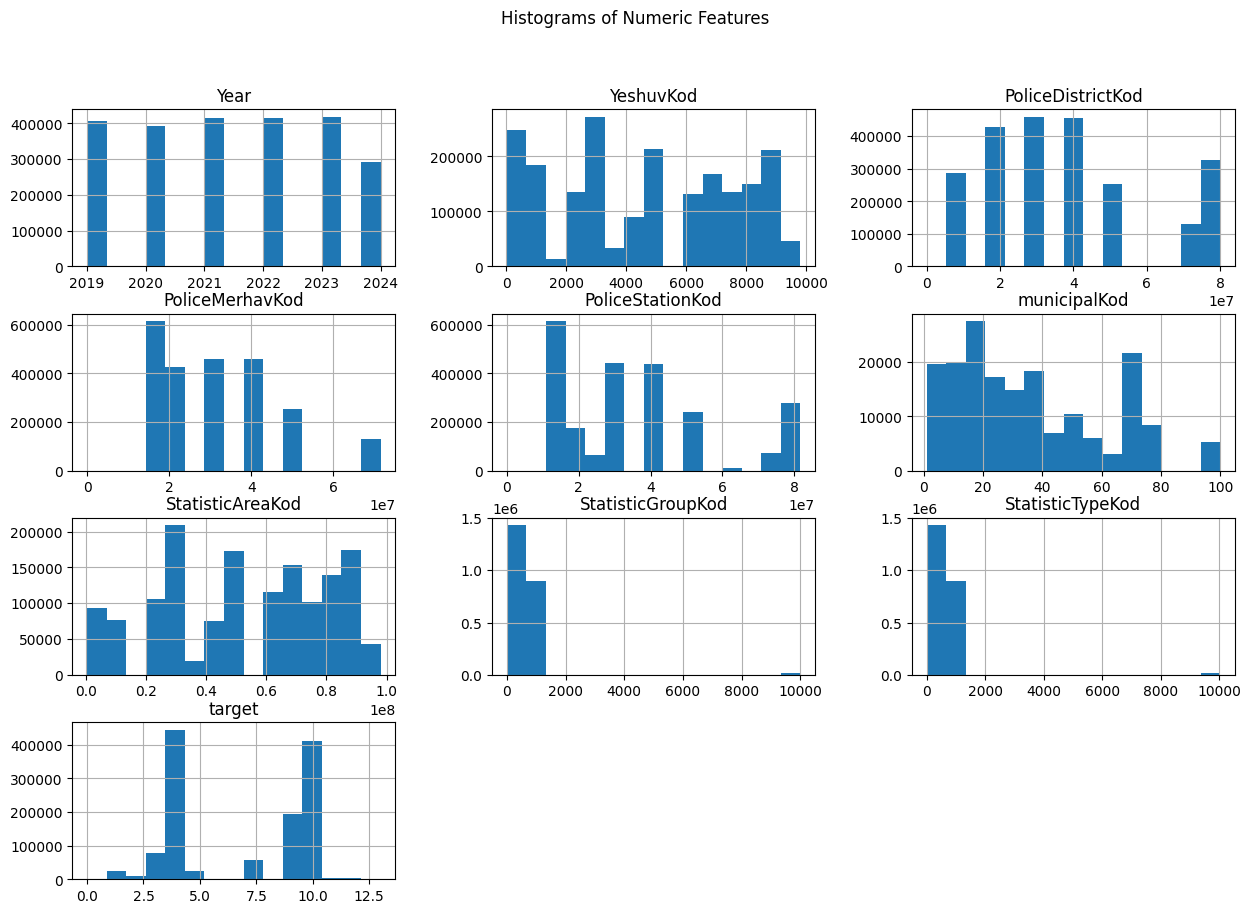

In [ ]:
# התפלגות משתנים מספריים
numeric_features = combined_data.select_dtypes(include=['int64', 'float64']).columns

# יצירת היסטוגרמות
combined_data[numeric_features].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features")
plt.show()



The yearly distribution of data appears relatively balanced, with a slight dip in records for 2024. This is expected since the dataset only includes data from Q1 to Q3 for that year.

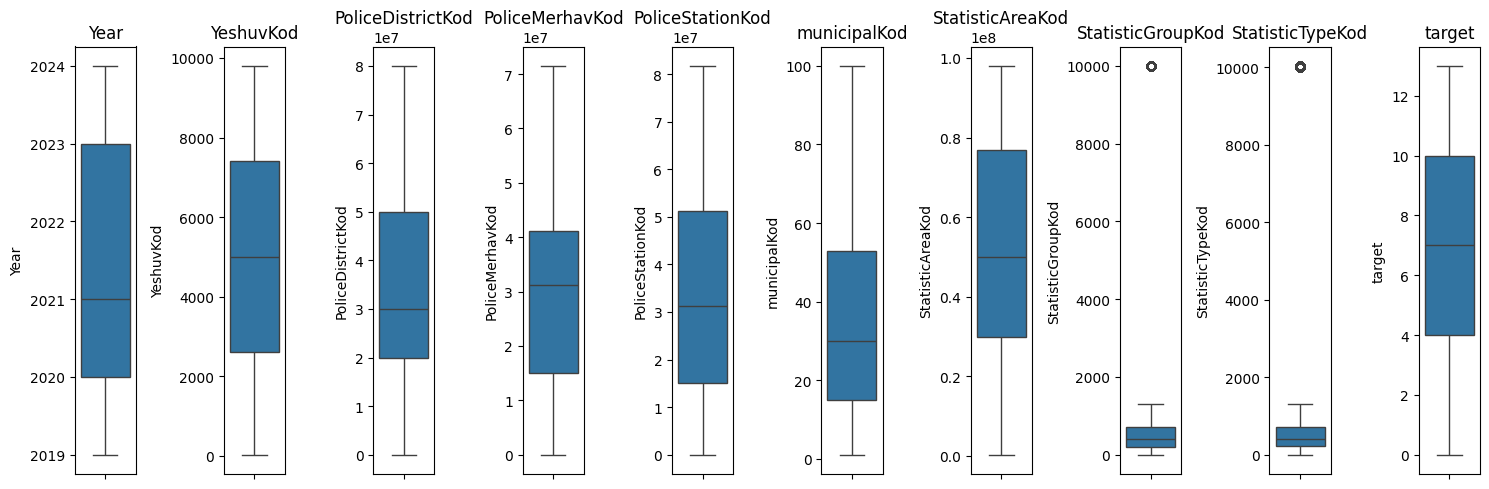

In [ ]:
# זיהוי חריגים עם Boxplot
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i + 1)
    sns.boxplot(y=combined_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

plt.close()

While many values are stored as floating-point numbers, they represent categorical data where each number corresponds to a specific category rather than a numerical value.

*   The Year column shows no outliers and is evenly distributed from 2019 to 2024, as expected.
*   The features StatisticGroupKod and StatisticTypeKod exhibit notable outliers. This is due to most categories being within a similar numerical range, while one of them deviate significantly (a value of 10,000).

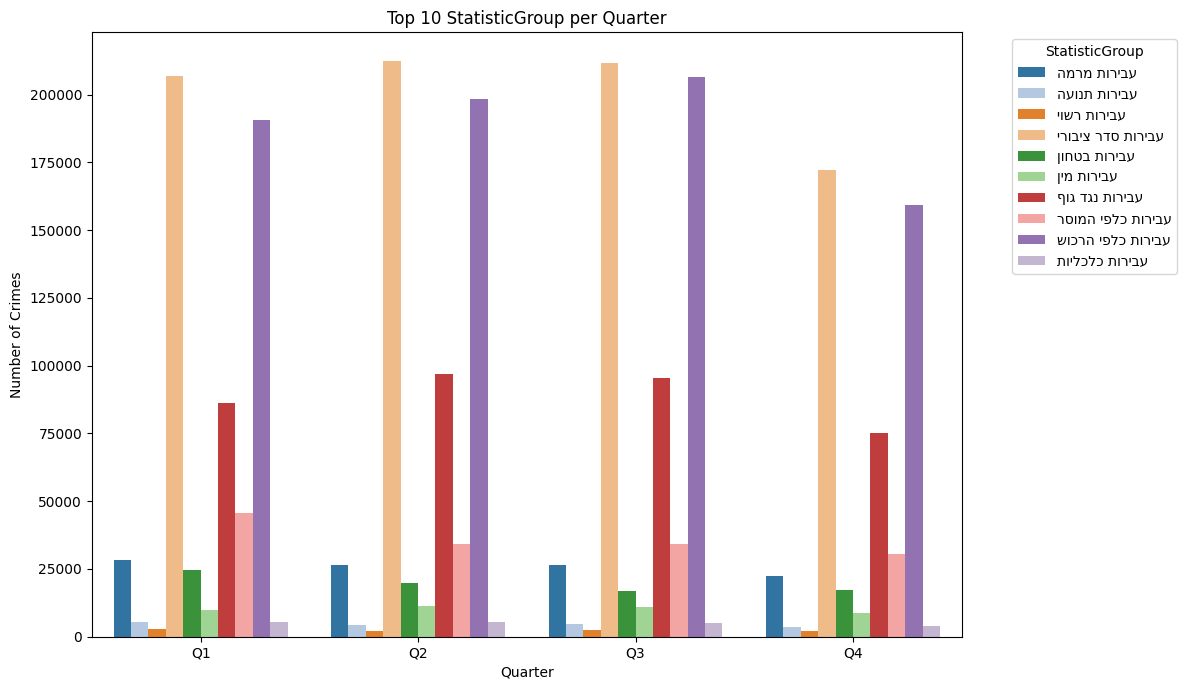

In [ ]:
# התקנת פונט עברי בגוגל קולאב (Installing Hebrew fonts in Google Colab)
!apt-get install -y fonts-freefont-ttf > /dev/null 2>&1  # Suppress warnings and messages

# Reverse Hebrew text for the 'StatisticType' column
def reverse_hebrew_text(text):
    return text[::-1] if isinstance(text, str) else text  # Reverse strings only

# Find the top N StatisticType categories by count
top_N = 10  # Adjust N as needed
top_types = combined_data['StatisticGroup'].value_counts().head(top_N).index

# Filter the DataFrame to include only these top categories
filtered_df = combined_data[combined_data['StatisticGroup'].isin(top_types)].copy()

# Apply the reverse function only to the 'StatisticType' column
filtered_df['StatisticGroup'] = filtered_df['StatisticGroup'].apply(reverse_hebrew_text)

# Group data by quarter and StatisticType
crime_grouped = filtered_df.groupby(['Quarter', 'StatisticGroup']).size().reset_index(name='count')

# Plot the data
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(12, 7))
sns.barplot(data=crime_grouped, x='Quarter', y='count', hue='StatisticGroup', palette='tab20')

# Add labels and titles
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')
plt.title(f'Top {top_N} StatisticGroup per Quarter')
plt.legend(title='StatisticGroup', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.close()


The analysis of the top 10 StatisticGroup categories per quarter highlights some key trends. Two categories, עבירות סדר ציבורי (Public Order Offenses) and עבירות כלכליות (Economic Offenses), dominate the dataset, consistently reporting the highest number of crimes across all four quarters. In contrast, categories like עבירות נגד גוף (Offenses Against the Body) and עבירות מין (Sexual Offenses) contribute significantly fewer crimes.

Overall, the number of crimes for most categories remains stable across quarters, indicating no significant seasonal variation in crime numbers.

# **Supervised Models Conclusion**

In [1]:
# Define the metrics for each model
metrics = {
    "Baseline Model": {
        "Accuracy": 0.001,
        "Precision": 0.000001,
        "Recall": 0.001,
        "F1 Score": 0.000002
    },
    "Decision Tree": {
        "Accuracy": 0.043,
        "Precision": 0.279,
        "Recall": 0.043,
        "F1 Score": 0.048
    },
    "DNN": {
        "Accuracy": 0.356,
        "Precision": 0.239,
        "Recall": 0.356,
        "F1 Score": 0.247
    },
    "Random Forest": {
        "Accuracy": 0.048,
        "Precision": 0.300,
        "Recall": 0.048,
        "F1 Score": 0.070
    },
    "LightGBM": {
        "Accuracy": 0.116,
        "Precision": 0.302,
        "Recall": 0.116,
        "F1 Score": 0.137
    },
    "XGBoost": {
        "Accuracy": 0.382,
        "Precision": 0.352,
        "Recall": 0.382,
        "F1 Score": 0.314
    }
}


In [2]:
# Create a DataFrame from the metrics dictionary
df_metrics = pd.DataFrame(metrics).T

# Sort the DataFrame by the 'Accuracy' column in descending order
df_metrics_sorted = df_metrics.sort_values(by='Accuracy', ascending=False)

# Print the sorted comparison table
print(df_metrics_sorted)

# Optionally, save the sorted comparison table to a CSV file
df_metrics_sorted.to_csv("sorted_model_comparison_table.csv", index=True)

                Accuracy  Precision  Recall  F1 Score
XGBoost            0.382   0.352000   0.382  0.314000
DNN                0.356   0.239000   0.356  0.247000
LightGBM           0.116   0.302000   0.116  0.137000
Random Forest      0.048   0.300000   0.048  0.070000
Decision Tree      0.043   0.279000   0.043  0.048000
Baseline Model     0.001   0.000001   0.001  0.000002


The XGBoost model outperforms all other models in terms of accuracy, precision, recall, and F1 score. It should be the preferred choice for this task.

DNN Performance: The Deep Neural Network also performs well and could be considered as an alternative to XGBoost if further improvements are made.

Tree-Based Models: The Decision Tree and Random Forest models perform poorly, indicating that they might not handle the complexity of the data well.

LightGBM: While better than the Random Forest, LightGBM still lags behind the XGBoost and DNN models.